In [1]:
using Pkg;
Pkg.activate(".");
Pkg.instantiate();
using LinearAlgebra, DataFrames, Plots, StatsPlots, LaTeXStrings; pyplot();
using Random, PyCall, Statistics, StatsBase, MLDataUtils;
using JLD;
include("nntutorial.jl");

 Activating environment at `~/Documents/GitHub/NNtutorial/Project.toml`


In [2]:
mnist_data = load("mnist_data.jld");

In [3]:
images = mnist_data["jl_images"];
targets = mnist_data["jl_targets"];
data = mnist_data["jl_data"];

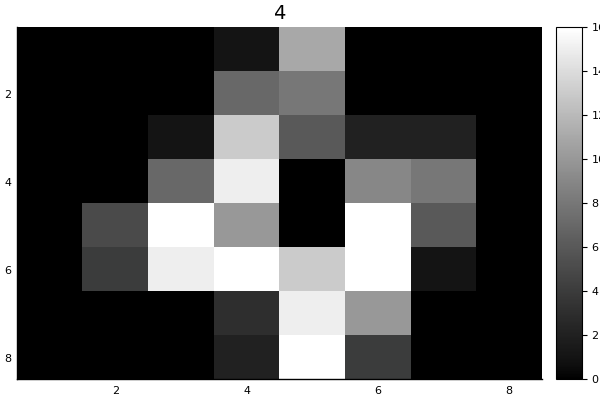

In [4]:
# visualization 
k = 5;
heatmap(images[k,:,:], color = :greys, yflip=true,title=targets[5])

In [5]:
# normalize the data
X = data./maximum(data); #standardize(ZScoreTransform, data, dims=1);
#function remove_nans(x)
#    if isnan(x)
#        return 0.0
#    else 
#        return x
#    end
#end
#X = remove_nans.(X);

In [6]:
# split the data
(x_train,y_train), (x_test,y_test) = splitobs((X', targets), at = 0.6);

In [7]:
yvtrain = nntutorial.convertytovect(y_train);
yvtest = nntutorial.convertytovect(y_test);

In [8]:
nn_structure = (64,30,10);

In [9]:
W, b, avg_cost_func = nntutorial.train_nn(nn_structure, x_train', yvtrain);

Starting gradient descent for 3000 iterations.
Iteration 0 of 3000 iterations.
Iteration 1000 of 3000 iterations.
Iteration 2000 of 3000 iterations.


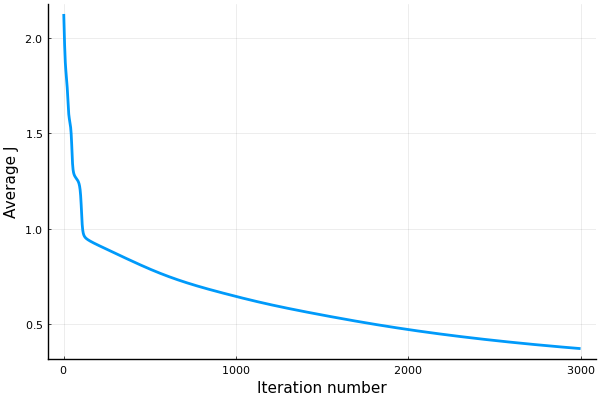

In [10]:
plot(avg_cost_func,legend=false,lw=2)
xlabel!("Iteration number")
ylabel!("Average J")

In [11]:
y_pred = nntutorial.predict_y(W,b,x_test',3);

In [12]:
skmets = pyimport("sklearn.metrics"); # import metrics from python

In [13]:
score = skmets.accuracy_score(y_test,y_pred .- 1)*100 # score

86.09179415855354